# **DATA CLEANING**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("/content/telco_churn.csv")
print("Shape:", df.shape)
print("Data types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nFirst 5 rows:\n", df.head())


Shape: (7043, 21)
Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract           

In [51]:
df.columns = df.columns.str.strip()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


/tmp/ipython-input-51-4260748835.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [52]:
df.drop(columns=['customerID'], inplace=True)
df.drop_duplicates(inplace=True)


In [53]:
binary_map = {
    'Yes': 1,
    'No': 0,
    'Female': 0,
    'Male': 1,
    'No internet service': 0,
    'No phone service': 0
}

binary_cols = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'Churn', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'MultipleLines', 'gender'
]

for col in binary_cols:
    if df[col].nunique() == 2 or 'No ' in df[col].unique().tolist():
        df[col] = df[col].replace(binary_map)
df = pd.get_dummies(df, drop_first=True)


/tmp/ipython-input-53-2622169363.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(binary_map)


In [54]:
print("Final shape after cleaning:", df.shape)
print("Remaining nulls:\n", df.isnull().sum().sum())
print("Columns:\n", df.columns)


Final shape after cleaning: (7021, 31)
Remaining nulls:
 0
Columns:
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


# **EDA**

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


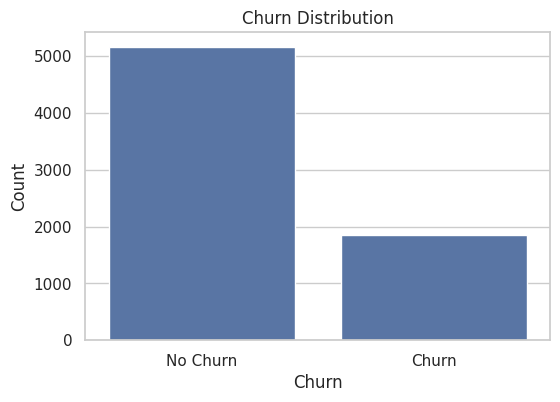

Churn ratio:
Churn
0    0.735508
1    0.264492
Name: proportion, dtype: float64


In [56]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title("Churn Distribution")
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.ylabel("Count")
plt.show()

# Churn ratio
print("Churn ratio:")
print(df['Churn'].value_counts(normalize=True))


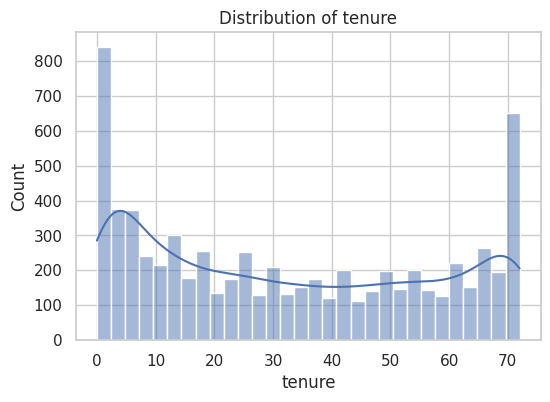

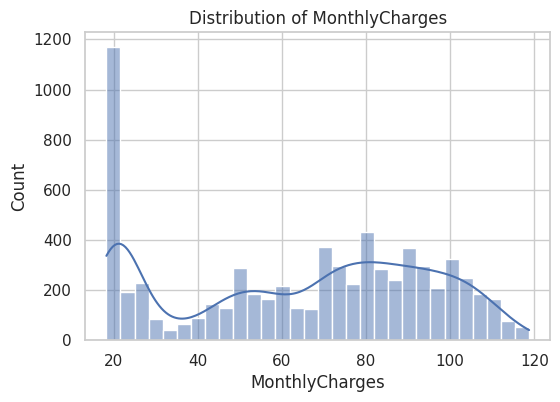

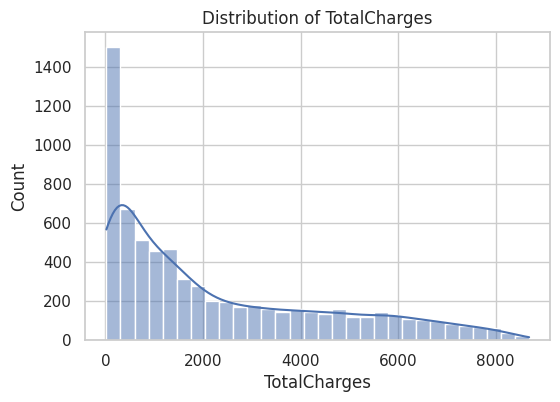

In [57]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


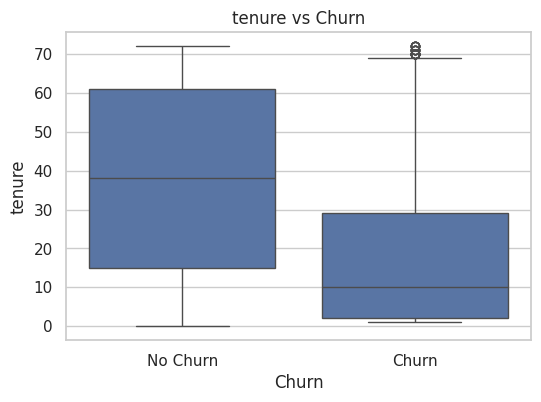

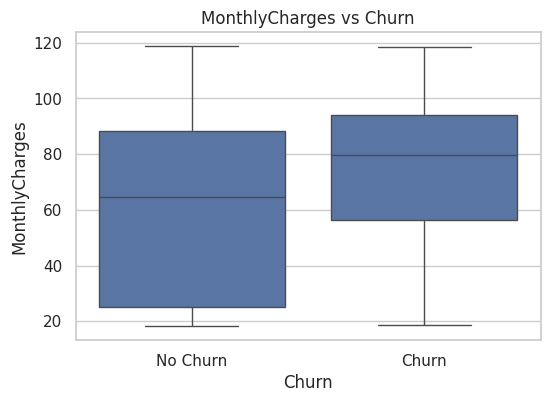

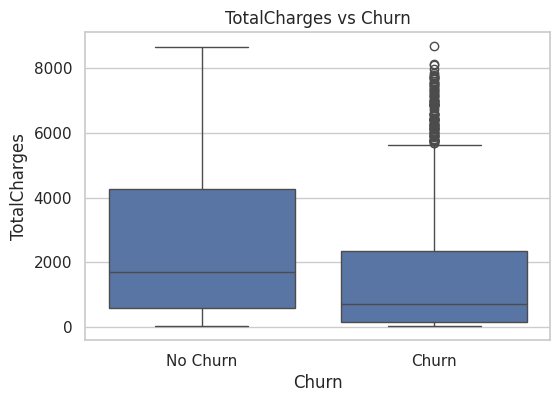

In [58]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.xticks([0, 1], ['No Churn', 'Churn'])
    plt.show()


<Figure size 700x400 with 0 Axes>

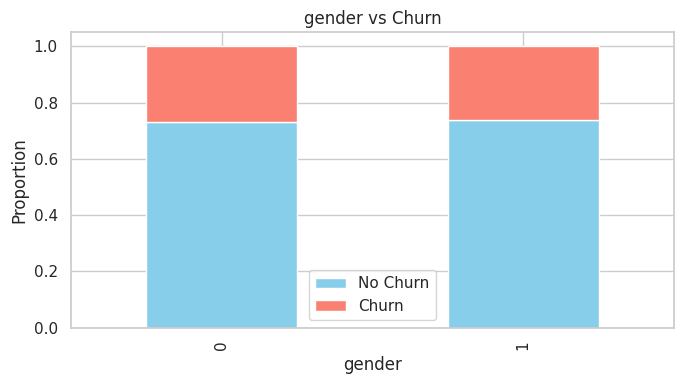

<Figure size 700x400 with 0 Axes>

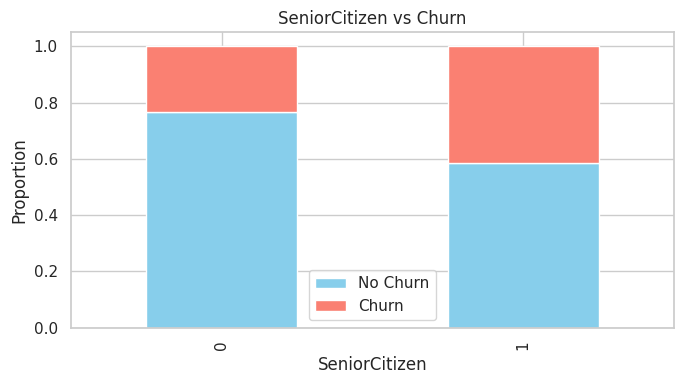

<Figure size 700x400 with 0 Axes>

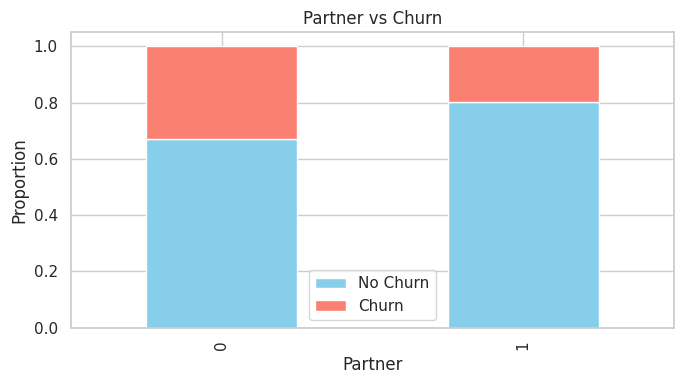

<Figure size 700x400 with 0 Axes>

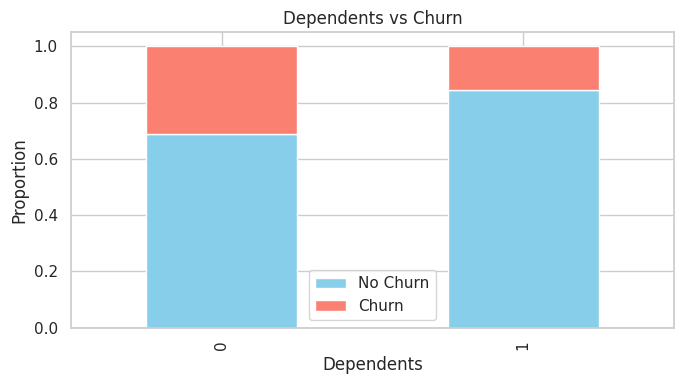

<Figure size 700x400 with 0 Axes>

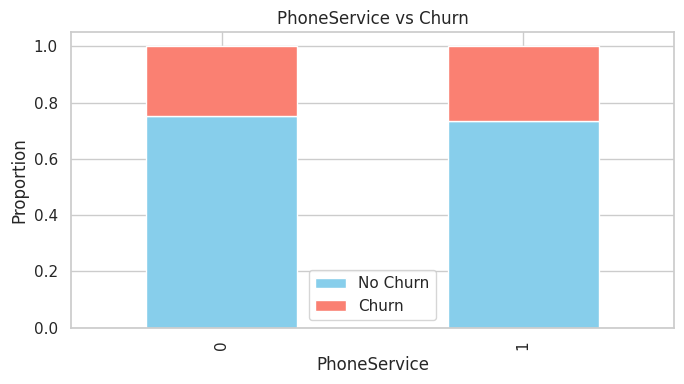

<Figure size 700x400 with 0 Axes>

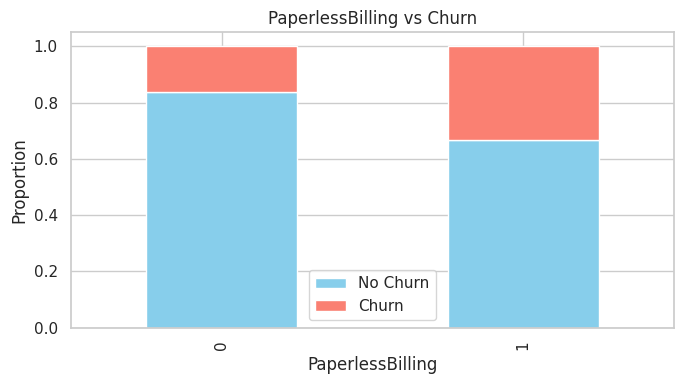

<Figure size 700x400 with 0 Axes>

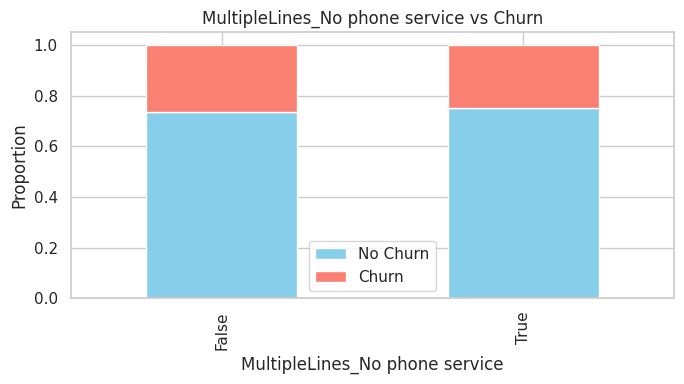

<Figure size 700x400 with 0 Axes>

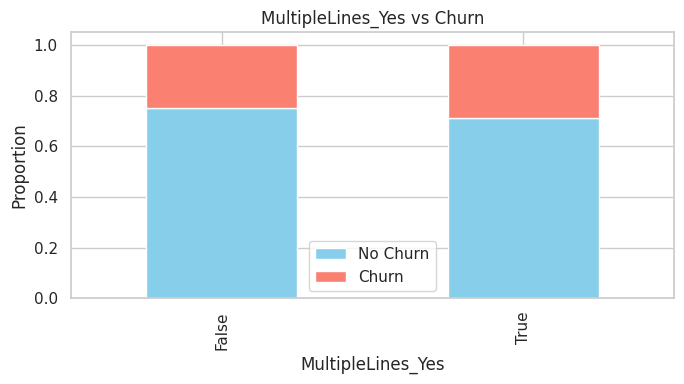

<Figure size 700x400 with 0 Axes>

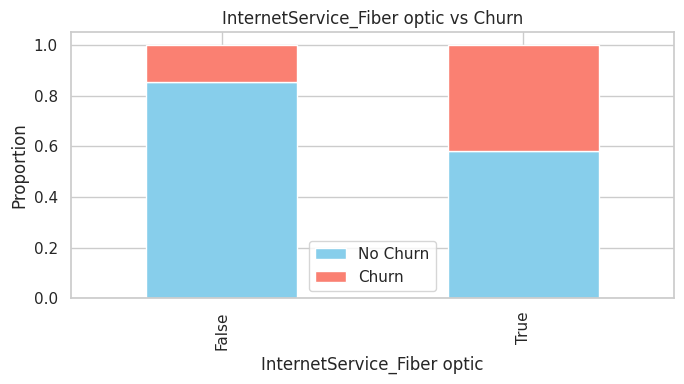

<Figure size 700x400 with 0 Axes>

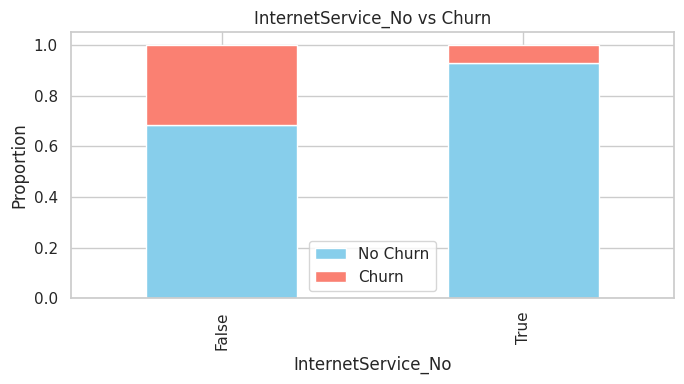

<Figure size 700x400 with 0 Axes>

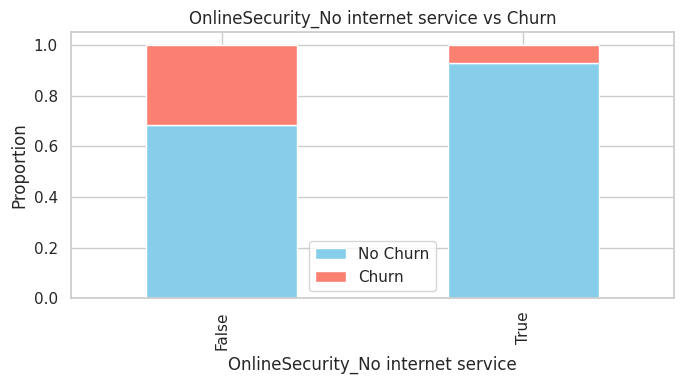

<Figure size 700x400 with 0 Axes>

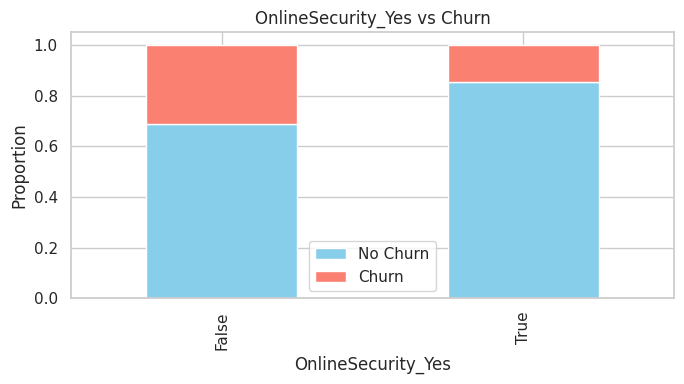

<Figure size 700x400 with 0 Axes>

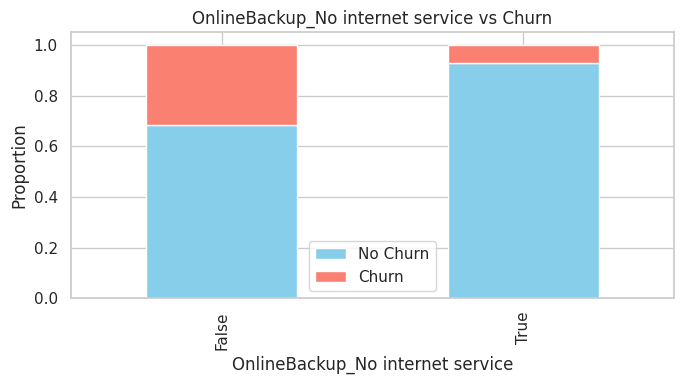

<Figure size 700x400 with 0 Axes>

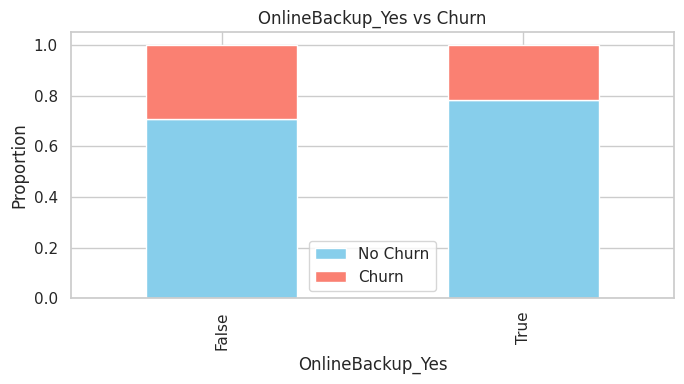

<Figure size 700x400 with 0 Axes>

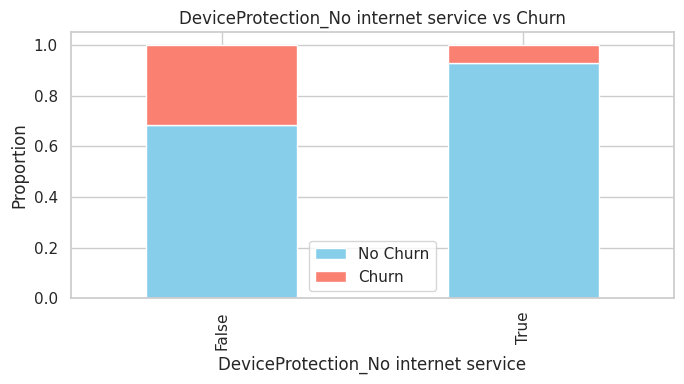

<Figure size 700x400 with 0 Axes>

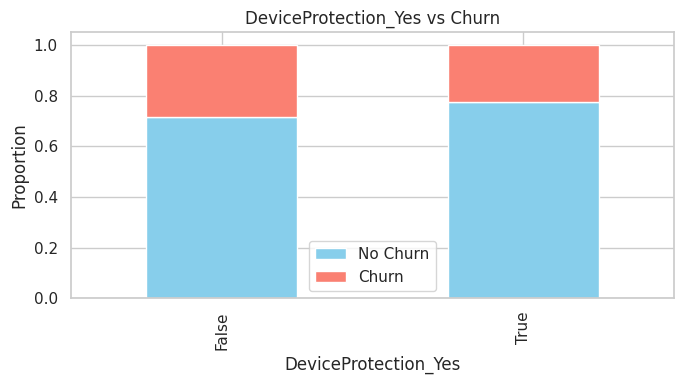

<Figure size 700x400 with 0 Axes>

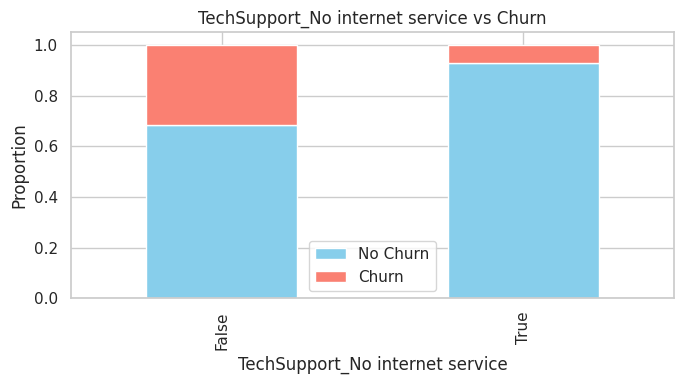

<Figure size 700x400 with 0 Axes>

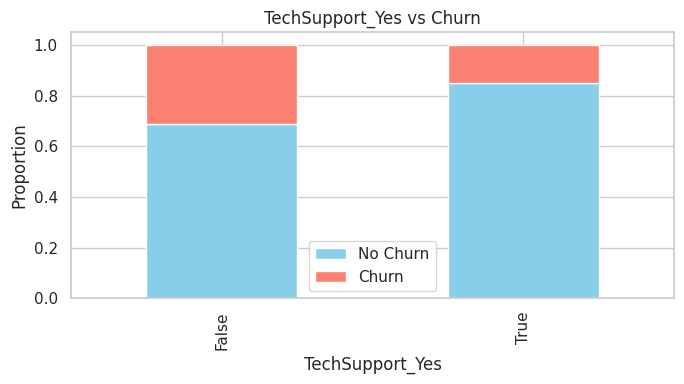

<Figure size 700x400 with 0 Axes>

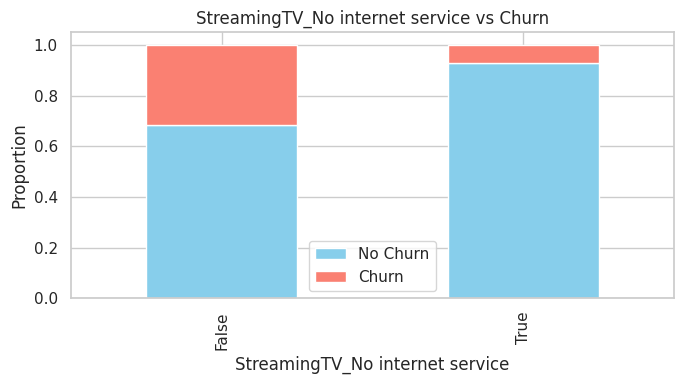

<Figure size 700x400 with 0 Axes>

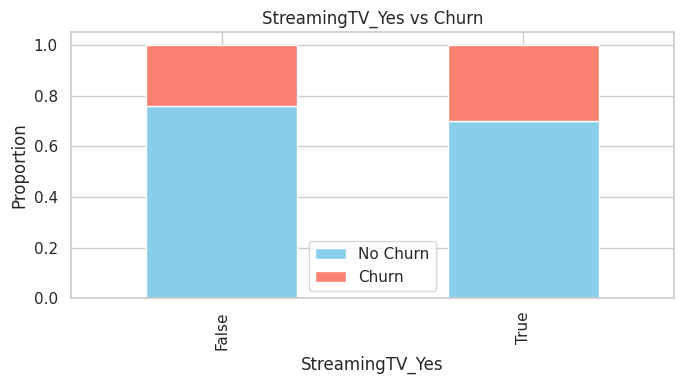

<Figure size 700x400 with 0 Axes>

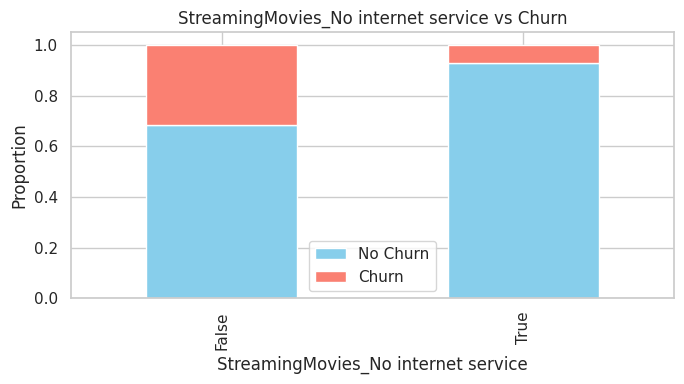

<Figure size 700x400 with 0 Axes>

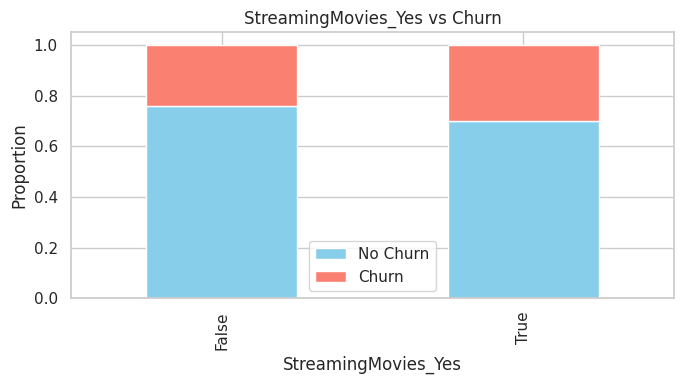

<Figure size 700x400 with 0 Axes>

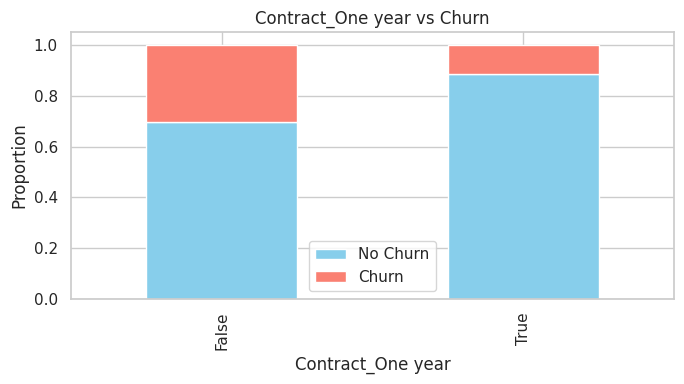

<Figure size 700x400 with 0 Axes>

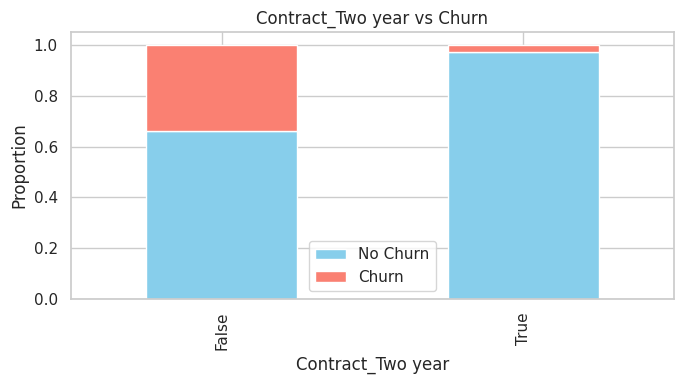

<Figure size 700x400 with 0 Axes>

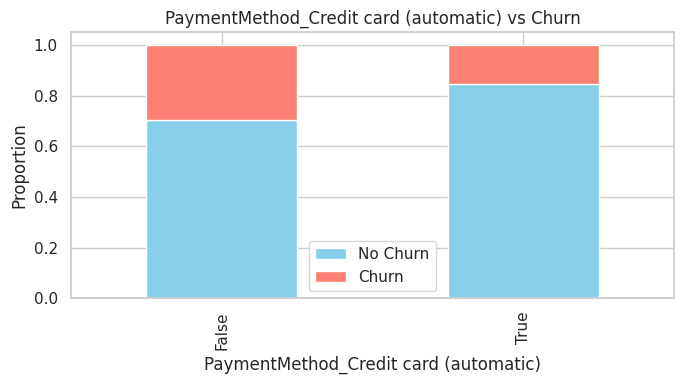

<Figure size 700x400 with 0 Axes>

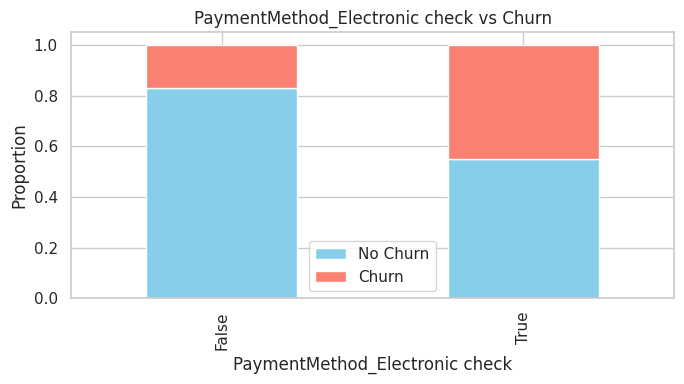

<Figure size 700x400 with 0 Axes>

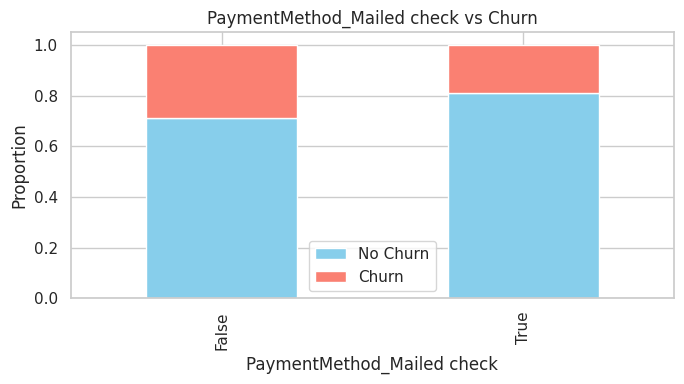

In [59]:
categorical_cols = [col for col in df.columns if df[col].nunique() <= 10 and col != 'Churn']

for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    churn_pct = pd.crosstab(df[col], df['Churn'], normalize='index')
    churn_pct.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(7, 4))
    plt.title(f"{col} vs Churn")
    plt.ylabel("Proportion")
    plt.legend(['No Churn', 'Churn'])
    plt.tight_layout()
    plt.show()


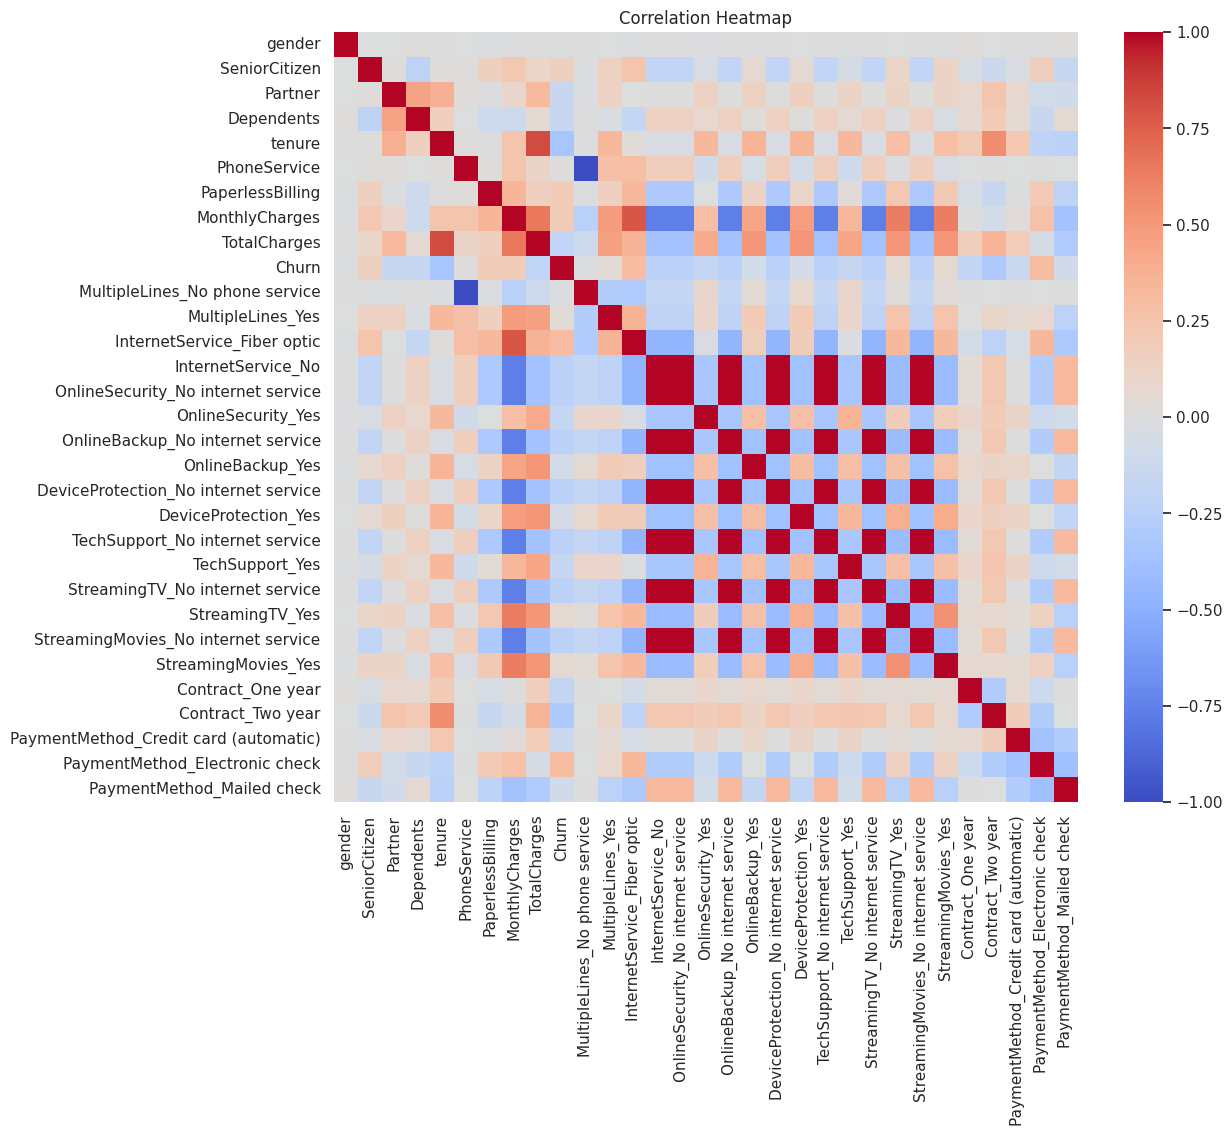

In [60]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [61]:
churn_corr = corr['Churn'].drop('Churn').sort_values(ascending=False)
print("Top positively correlated with Churn:\n", churn_corr.head(5))
print("\nTop negatively correlated with Churn:\n", churn_corr.tail(5))


Top positively correlated with Churn:
 InternetService_Fiber optic       0.308170
PaymentMethod_Electronic check    0.301544
MonthlyCharges                    0.194508
PaperlessBilling                  0.190891
SeniorCitizen                     0.151619
Name: Churn, dtype: float64

Top negatively correlated with Churn:
 DeviceProtection_No internet service   -0.228533
StreamingMovies_No internet service    -0.228533
TechSupport_No internet service        -0.228533
Contract_Two year                      -0.302076
tenure                                 -0.351508
Name: Churn, dtype: float64


In [62]:
# AvgChargesPerMonth (avoid divide by zero)
df_encoded['AvgChargesPerMonth'] = df_encoded['TotalCharges'] / df_encoded['tenure'].replace(0, 1)

# IsLongTermCustomer
df_encoded['IsLongTermCustomer'] = (df_encoded['tenure'] > 24).astype(int)

# HasStreamingService
if 'StreamingTV' in df_encoded.columns and 'StreamingMovies' in df_encoded.columns:
    df_encoded['HasStreamingService'] = df_encoded['StreamingTV'] + df_encoded['StreamingMovies']
    df_encoded['HasStreamingService'] = df_encoded['HasStreamingService'].apply(lambda x: 1 if x > 0 else 0)

# HasSecurityBackup
if 'OnlineSecurity' in df_encoded.columns and 'OnlineBackup' in df_encoded.columns:
    df_encoded['HasSecurityBackup'] = df_encoded['OnlineSecurity'] + df_encoded['OnlineBackup']
    df_encoded['HasSecurityBackup'] = df_encoded['HasSecurityBackup'].apply(lambda x: 1 if x > 0 else 0)

# Tenure Buckets
df_encoded['TenureGroup'] = pd.cut(df_encoded['tenure'], bins=[0, 12, 24, 48, 72], labels=['0–12','13–24','25–48','49–72'])

# MonthlyCharges Group
df_encoded['MonthlyChargesGroup'] = pd.cut(df_encoded['MonthlyCharges'], bins=4, labels=['Low','Medium','High','Very High'])

# One-hot encode new categorical buckets
df_encoded = pd.get_dummies(df_encoded, columns=['TenureGroup', 'MonthlyChargesGroup'], drop_first=True)


KeyError: 'TotalCharges'

In [63]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df_encoded.copy()
if 'Churn' in X.columns:
    X = X.drop(columns=['Churn'])

X = X.apply(pd.to_numeric, errors='coerce')
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
non_numeric = X.select_dtypes(include=['object', 'bool']).columns.tolist()
X = X.drop(columns=non_numeric)
X_const = add_constant(X)
vif_df = pd.DataFrame()
vif_df["feature"] = X_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif_df_sorted = vif_df.sort_values(by="VIF", ascending=False)
print(vif_df_sorted)


                feature        VIF
0                 const  16.839375
17  HasStreamingService   6.196406
18    HasSecurityBackup   5.606247
14       MonthlyCharges   4.634276
8          OnlineBackup   3.335117
12      StreamingMovies   3.296300
11          StreamingTV   3.219688
7        OnlineSecurity   2.539793
9      DeviceProtection   1.506437
6         MultipleLines   1.474691
16   IsLongTermCustomer   1.425962
5          PhoneService   1.415808
3               Partner   1.415143
4            Dependents   1.376162
10          TechSupport   1.352866
15   AvgChargesPerMonth   1.292452
13     PaperlessBilling   1.192325
2         SeniorCitizen   1.144532
1                gender   1.000869


# **LOGISTIC REGRESSION**

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [23]:
log_reg = LogisticRegression(max_iter=5000, solver='liblinear')
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=5000, solver='liblinear')

Confusion Matrix:
 [[926 109]
 [181 193]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

ROC AUC Score: 0.8379007465963988


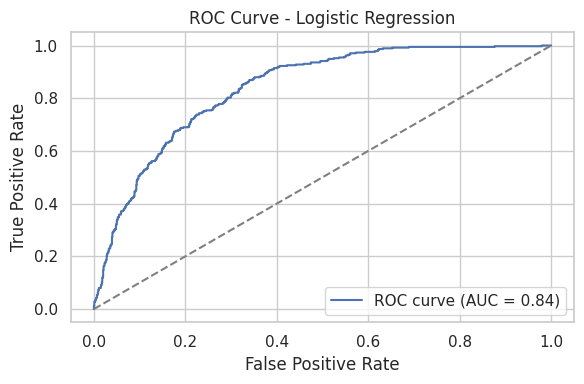

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
auc_score = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", auc_score)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **LOGISTIC REGRESSION + SMOTE**

In [67]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("After SMOTE:\n", y_resampled.value_counts())


After SMOTE:
 Churn
0    5174
1    5174
Name: count, dtype: int64


Confusion Matrix:
 [[829 206]
 [177 858]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1035
           1       0.81      0.83      0.82      1035

    accuracy                           0.81      2070
   macro avg       0.82      0.81      0.81      2070
weighted avg       0.82      0.81      0.81      2070

ROC AUC Score: 0.9024705360685197


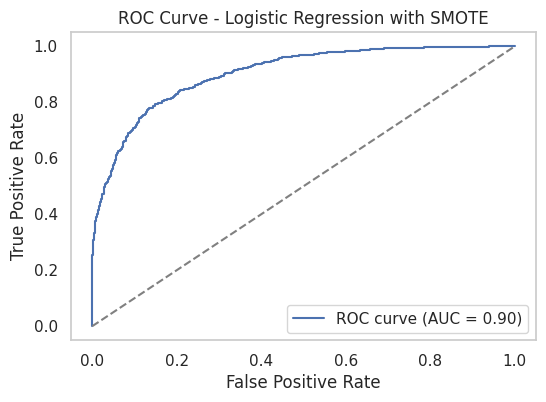

In [68]:
from sklearn.model_selection import train_test_split

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)
from sklearn.linear_model import LogisticRegression

log_reg_sm = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg_sm.fit(X_train_sm, y_train_sm)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_pred_sm = log_reg_sm.predict(X_test_sm)
y_proba_sm = log_reg_sm.predict_proba(X_test_sm)[:, 1]
print("Confusion Matrix:\n", confusion_matrix(y_test_sm, y_pred_sm))
print("\nClassification Report:\n", classification_report(y_test_sm, y_pred_sm))
print("ROC AUC Score:", roc_auc_score(y_test_sm, y_proba_sm))
fpr, tpr, thresholds = roc_curve(y_test_sm, y_proba_sm)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test_sm, y_proba_sm):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression with SMOTE")
plt.legend()
plt.grid()
plt.show()


# **XGBoost + SMOTE**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:03:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[831 204]
 [163 872]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      1035
           1       0.81      0.84      0.83      1035

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

ROC AUC Score: 0.9081714859156574


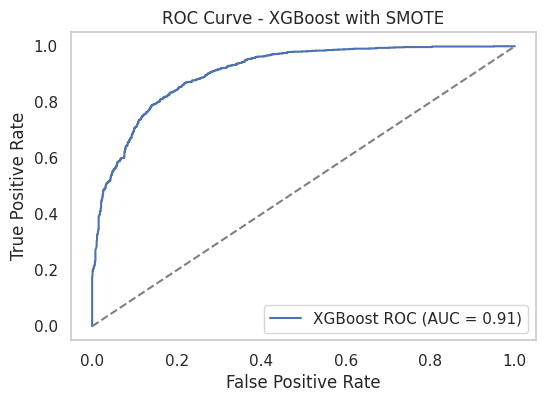

In [69]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)
xgb_clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)

xgb_clf.fit(X_train_xgb, y_train_xgb)
y_pred_xgb = xgb_clf.predict(X_test_xgb)
y_proba_xgb = xgb_clf.predict_proba(X_test_xgb)[:, 1]
print("Confusion Matrix:\n", confusion_matrix(y_test_xgb, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test_xgb, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test_xgb, y_proba_xgb))
fpr, tpr, _ = roc_curve(y_test_xgb, y_proba_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'XGBoost ROC (AUC = {roc_auc_score(y_test_xgb, y_proba_xgb):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost with SMOTE")
plt.legend()
plt.grid()
plt.show()


# **Stacked Models with SMOTE + Hyperparameter Tuning**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[845 190]
 [166 869]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1035
           1       0.82      0.84      0.83      1035

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070

ROC AUC Score: 0.9152288268104273


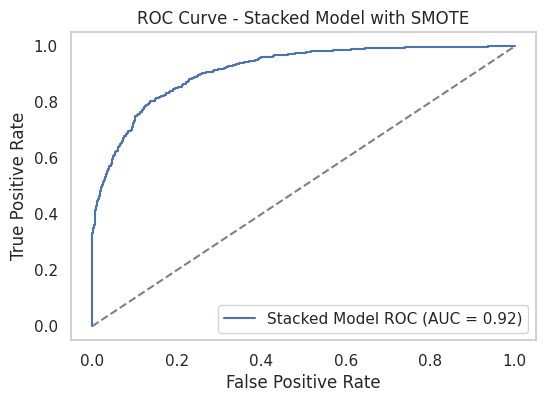

In [70]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)
log_reg = LogisticRegression(max_iter=2000, solver='liblinear')
rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
stacked_model = StackingClassifier(
    estimators=[
        ('lr', log_reg),
        ('rf', rf),
        ('xgb', xgb)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=True,
    n_jobs=-1
)
stacked_model.fit(X_train_st, y_train_st)

y_pred_st = stacked_model.predict(X_test_st)
y_proba_st = stacked_model.predict_proba(X_test_st)[:, 1]
print("Confusion Matrix:\n", confusion_matrix(y_test_st, y_pred_st))
print("\nClassification Report:\n", classification_report(y_test_st, y_pred_st))
print("ROC AUC Score:", roc_auc_score(y_test_st, y_proba_st))
fpr, tpr, _ = roc_curve(y_test_st, y_proba_st)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Stacked Model ROC (AUC = {roc_auc_score(y_test_st, y_proba_st):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Stacked Model with SMOTE")
plt.legend()
plt.grid()
plt.show()


# **NN + SMOTE**

Confusion Matrix:
 [[762 273]
 [133 902]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.74      0.79      1035
           1       0.77      0.87      0.82      1035

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070

ROC AUC Score: 0.9028112674741533


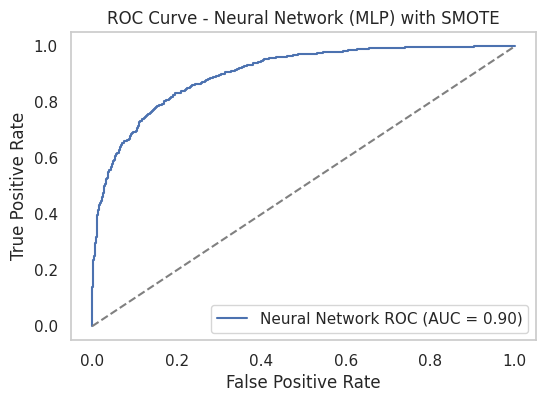

In [71]:
from sklearn.neural_network import MLPClassifier
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

mlp.fit(X_train_nn, y_train_nn)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

y_pred_nn = mlp.predict(X_test_nn)
y_proba_nn = mlp.predict_proba(X_test_nn)[:, 1]
print("Confusion Matrix:\n", confusion_matrix(y_test_nn, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_nn, y_pred_nn))
print("ROC AUC Score:", roc_auc_score(y_test_nn, y_proba_nn))
fpr, tpr, _ = roc_curve(y_test_nn, y_proba_nn)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Neural Network ROC (AUC = {roc_auc_score(y_test_nn, y_proba_nn):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network (MLP) with SMOTE")
plt.legend()
plt.grid()
plt.show()


# **OVERFIITTING AND UNDERFITTING**

In [72]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

def evaluate_model_fit(model, X_train, X_test, y_train, y_test, name, prob_func='predict_proba'):
    if prob_func == 'predict_proba':
        y_train_prob = model.predict_proba(X_train)[:, 1]
        y_test_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_train_prob = model.predict(X_train)
        y_test_prob = model.predict(X_test)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return {
        'Model': name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Train Recall': recall_score(y_train, y_train_pred),
        'Test Recall': recall_score(y_test, y_test_pred),
        'Train AUC': roc_auc_score(y_train, y_train_prob),
        'Test AUC': roc_auc_score(y_test, y_test_prob)
    }


In [73]:
results = []
results.append(evaluate_model_fit(log_reg_sm, X_train_sm, X_test_sm, y_train_sm, y_test_sm, "Logistic + SMOTE"))
results.append(evaluate_model_fit(xgb_clf, X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb, "XGBoost + SMOTE"))
results.append(evaluate_model_fit(stacked_model, X_train_st, X_test_st, y_train_st, y_test_st, "Stacked + SMOTE"))
results.append(evaluate_model_fit(mlp, X_train_nn, X_test_nn, y_train_nn, y_test_nn, "NN + SMOTE"))
fit_df = pd.DataFrame(results)
fit_df['Accuracy Gap'] = fit_df['Train Accuracy'] - fit_df['Test Accuracy']
fit_df['Recall Gap'] = fit_df['Train Recall'] - fit_df['Test Recall']
fit_df['AUC Gap'] = fit_df['Train AUC'] - fit_df['Test AUC']

print(fit_df.round(3))


              Model  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
0  Logistic + SMOTE           0.822          0.815         0.826        0.829   
1   XGBoost + SMOTE           0.845          0.823         0.862        0.843   
2   Stacked + SMOTE           0.845          0.828         0.849        0.840   
3        NN + SMOTE           0.819          0.804         0.883        0.871   

   Train AUC  Test AUC  Accuracy Gap  Recall Gap  AUC Gap  
0      0.909     0.902         0.007      -0.003    0.006  
1      0.927     0.908         0.023       0.019    0.019  
2      0.930     0.915         0.017       0.009    0.015  
3      0.912     0.903         0.015       0.012    0.009  


# **IMPROVED NN + SMOTE**

In [74]:
from sklearn.neural_network import MLPClassifier
mlp_improved = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0005,
    learning_rate='adaptive',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10
)

# Train
mlp_improved.fit(X_train_nn, y_train_nn)


MLPClassifier(alpha=0.0005, early_stopping=True,
              hidden_layer_sizes=(128, 64, 32), learning_rate='adaptive',
              max_iter=500, random_state=42)

Confusion Matrix:
 [[828 207]
 [160 875]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      1035
           1       0.81      0.85      0.83      1035

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

ROC AUC Score: 0.9044831851385097


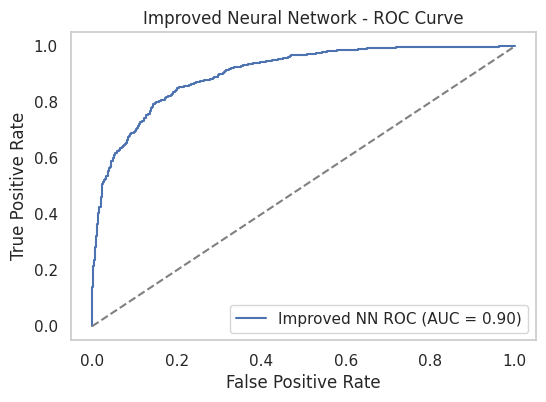

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

y_pred_imp = mlp_improved.predict(X_test_nn)
y_proba_imp = mlp_improved.predict_proba(X_test_nn)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test_nn, y_pred_imp))
print("\nClassification Report:\n", classification_report(y_test_nn, y_pred_imp))
print("ROC AUC Score:", roc_auc_score(y_test_nn, y_proba_imp))
fpr, tpr, _ = roc_curve(y_test_nn, y_proba_imp)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Improved NN ROC (AUC = {roc_auc_score(y_test_nn, y_proba_imp):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Improved Neural Network - ROC Curve")
plt.legend()
plt.grid()
plt.show()


# **MODEL COMAPARISON**

In [76]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import pandas as pd
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall (Churn=1)': recall_score(y_test, y_pred),
        'Precision (Churn=1)': precision_score(y_test, y_pred),
        'F1-score (Churn=1)': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    }
results = []
results.append(evaluate_model("Logistic + SMOTE", log_reg_sm, X_test_sm, y_test_sm))
results.append(evaluate_model("XGBoost + SMOTE", xgb_clf, X_test_xgb, y_test_xgb))
results.append(evaluate_model("Stacked + SMOTE", stacked_model, X_test_st, y_test_st))
results.append(evaluate_model("NN + SMOTE (Original)", mlp, X_test_nn, y_test_nn))
results.append(evaluate_model("NN + SMOTE (Improved)", mlp_improved, X_test_nn, y_test_nn))

comparison_df = pd.DataFrame(results)
print(comparison_df.round(3))




                   Model  Accuracy  Recall (Churn=1)  Precision (Churn=1)  \
0       Logistic + SMOTE     0.815             0.829                0.806   
1        XGBoost + SMOTE     0.823             0.843                0.810   
2        Stacked + SMOTE     0.828             0.840                0.821   
3  NN + SMOTE (Original)     0.804             0.871                0.768   
4  NN + SMOTE (Improved)     0.823             0.845                0.809   

   F1-score (Churn=1)  ROC AUC  
0               0.818    0.902  
1               0.826    0.908  
2               0.830    0.915  
3               0.816    0.903  
4               0.827    0.904  


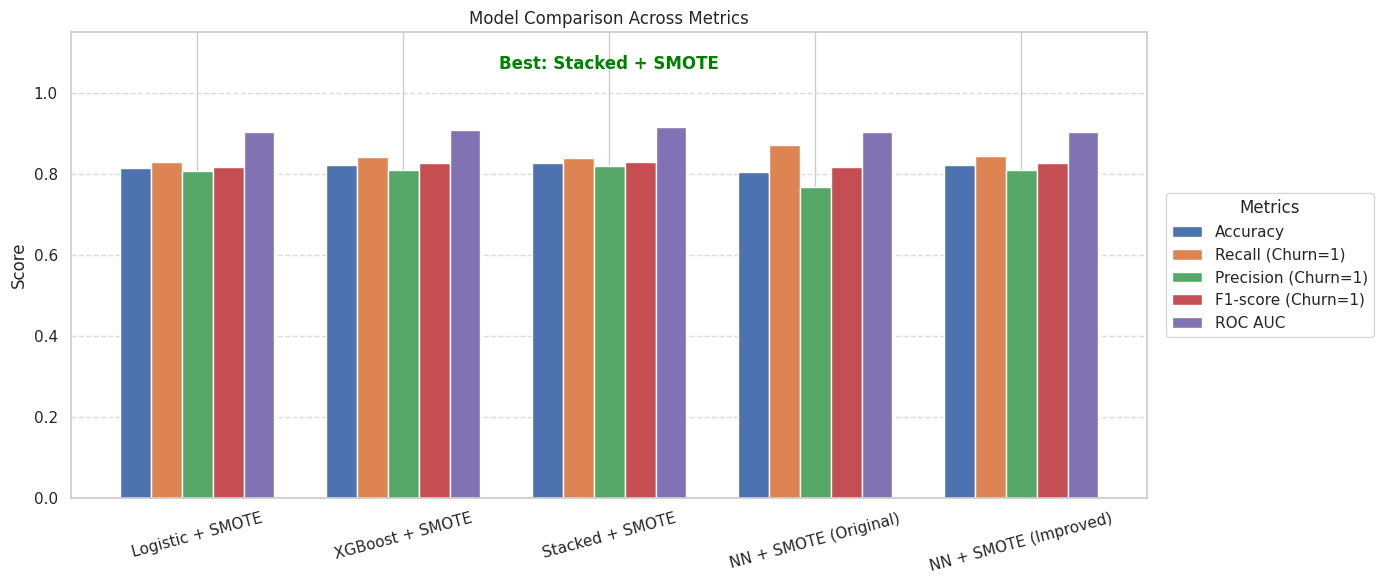

In [80]:
import matplotlib.pyplot as plt
import numpy as np
metrics = ['Accuracy', 'Recall (Churn=1)', 'Precision (Churn=1)', 'F1-score (Churn=1)', 'ROC AUC']
models = comparison_df['Model'].values
scores = comparison_df[metrics].values
comparison_df['Average Score'] = comparison_df[metrics].mean(axis=1)
best_model_idx = comparison_df['Average Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
x = np.arange(len(models))
width = 0.15
plt.figure(figsize=(14, 6))

for i, metric in enumerate(metrics):
    plt.bar(x + i * width, scores[:, i], width, label=metric)
plt.text(
    x[best_model_idx] + width * 2,
    1.06,
    f"Best: {best_model_name}",
    color='green',
    fontsize=12,
    ha='center',
    fontweight='bold'
)

plt.xticks(x + width * 2, models, rotation=15)
plt.ylabel("Score")
plt.ylim(0, 1.15)
plt.title("Model Comparison Across Metrics")
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), title='Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
